In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **1. Loading Dataset**

In [2]:
# Loading the data
new_data = pd.read_csv("/kaggle/input/seperated-data/Australia_Newcastle.csv")

# print the shape
print(new_data.shape)

#runs the first 5 rows
new_data.head()

(2769, 12)


,Date,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
0,2014-12-29,NaN,4.7,15.2,9.0,12.0,2.9,NaN,NaN,NaN,NaN,Australia_Newcastle
1,2014-12-30,3.4,4.7,19.2,21.0,23.0,1.5,NaN,NaN,NaN,NaN,Australia_Newcastle
2,2014-12-31,2.3,2.8,17.6,38.0,39.0,1.5,NaN,NaN,NaN,NaN,Australia_Newcastle
3,2015-01-01,2.3,1.9,16.8,24.0,38.0,1.5,NaN,NaN,NaN,NaN,Australia_Newcastle
4,2015-01-02,NaN,3.8,10.4,24.0,42.0,2.9,NaN,NaN,NaN,NaN,Australia_Newcastle


In [3]:
# Find the minimum and maximum dates
min_date = new_data['Date'].min()
max_date = new_data['Date'].max()

print('Minimum date:', min_date)
print('Maximum date:', max_date)

Minimum date: 2014-12-29
Maximum date: 2025-01-09


In [4]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2769 non-null   object 
 1   co            858 non-null    float64
 2   no2           2769 non-null   float64
 3   o3            1067 non-null   float64
 4   pm10          2769 non-null   float64
 5   pm25          2768 non-null   float64
 6   so2           2760 non-null   float64
 7   humidity      2053 non-null   float64
 8   pressure      2053 non-null   float64
 9   temperature   2053 non-null   float64
 10  wind-speed    1971 non-null   float64
 11  Country_City  2769 non-null   object 
dtypes: float64(10), object(2)
memory usage: 259.7+ KB


In [5]:
new_data.describe()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed
count,858.000000,2769.000000,1067.000000,2769.000000,2768.000000,2760.000000,2053.000000,2053.000000,2053.000000,1971.000000
mean,3.138695,6.514121,13.619213,18.044059,26.636199,2.290507,76.125037,1017.074963,18.027667,3.545358
std,1.590218,3.673895,5.315606,7.945911,14.282966,1.146280,12.383626,6.779257,4.160502,1.683754
min,1.200000,1.000000,0.800000,4.000000,8.000000,1.500000,27.000000,993.700000,8.200000,0.300000
25%,2.300000,3.800000,10.400000,13.000000,17.000000,1.500000,69.600000,1012.400000,14.400000,2.500000
50%,3.400000,5.600000,13.600000,17.000000,23.000000,1.500000,78.200000,1017.000000,18.200000,3.100000
75%,3.400000,9.300000,16.800000,21.000000,32.000000,2.900000,85.100000,1022.000000,21.200000,4.300000
max,16.700000,22.300000,41.600000,87.000000,172.000000,17.200000,98.000000,1035.900000,32.000000,13.000000


In [6]:
# Investigate all the elements whithin each Feature

for column in new_data:
    # Handle numerical and string columns differently
    if new_data[column].dtype == 'object':  # Check if column is of object type
        unique_vals = new_data[column].unique()  # pandas unique for strings
    else:
        unique_vals = np.unique(new_data[column])  # numpy unique for numerical types

    nr_values = len(unique_vals)
    if nr_values < 14:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Date :2767
The number of values for feature co :11 -- [ 1.2  2.3  3.4  4.5  5.6  6.7  7.8  8.9 11.2 16.7  nan]
The number of values for feature no2 :22
The number of values for feature o3 :40
The number of values for feature pm10 :61
The number of values for feature pm25 :81
The number of values for feature so2 :9 -- [ 1.5  2.9  4.3  5.8  7.2  8.6 10.  17.2  nan]
The number of values for feature humidity :477
The number of values for feature pressure :323
The number of values for feature temperature :189
The number of values for feature wind-speed :105
The number of values for feature Country_City :1 -- ['Australia_Newcastle']


In [7]:
new_data.isna().sum()

Date               0
co              1911
no2                0
o3              1702
pm10               0
pm25               1
so2                9
humidity         716
pressure         716
temperature      716
wind-speed       798
Country_City       0
dtype: int64

# **1.2 - Function**

In [8]:
print(os.listdir('/kaggle/usr/lib/function'))

['__script__.py', '__results__.html', '__script__.ipynb', 'function.py', '__output__.json', 'custom.css']


In [9]:
import sys
sys.path.append("/kaggle/usr/lib/function")  # Add directory to the path

import function as fn

In [10]:
# Use the functions
new_data1 = fn.prepare_datetime_index(new_data, date_column='Date')
new_data1.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
Date,,,,,,,,,,,
2014-12-29,NaN,4.7,15.2,9.0,12.0,2.9,NaN,NaN,NaN,NaN,Australia_Newcastle
2014-12-30,3.4,4.7,19.2,21.0,23.0,1.5,NaN,NaN,NaN,NaN,Australia_Newcastle
2014-12-31,2.3,2.8,17.6,38.0,39.0,1.5,NaN,NaN,NaN,NaN,Australia_Newcastle
2015-01-01,2.3,1.9,16.8,24.0,38.0,1.5,NaN,NaN,NaN,NaN,Australia_Newcastle
2015-01-02,NaN,3.8,10.4,24.0,42.0,2.9,NaN,NaN,NaN,NaN,Australia_Newcastle


In [11]:
# Use the functions
new_data2 = fn.fill_pollutant_values(new_data1)
print(new_data2.isna().sum())

co              0
no2             0
o3              0
pm10            0
pm25            0
so2             0
humidity        0
pressure        0
temperature     0
wind-speed      0
Country_City    0
dtype: int64


**Check**

In [12]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data2.index.min(), end=new_data2.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data2.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex(['2015-01-18', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=898, freq=None)


In [13]:
new_data3 = fn.impute_missing_dates(new_data2)

In [14]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data3.index.min(), end=new_data3.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data3.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [15]:
duplicates = new_data3.index[new_data3.index.duplicated()]
print(f"Duplicate indexes: {duplicates}")

Duplicate indexes: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


# **1.3.Normal AQI count, After Normal AQI count Smoothing AQI(IQR, Z-score, Rolling), (Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi).**

In [16]:
new_data4 = fn.calculate_aqi(new_data3, subindex_columns=['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])

In [17]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI
2014-12-29,3.138695,4.7,15.2,9.0,12.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,15.0
2014-12-30,3.400000,4.7,19.2,21.0,23.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,23.0
2014-12-31,2.300000,2.8,17.6,38.0,39.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,39.0
2015-01-01,2.300000,1.9,16.8,24.0,38.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,38.0
2015-01-02,3.138695,3.8,10.4,24.0,42.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,42.0


In [18]:
new_data4.shape

(3665, 13)

 After Normal AQI count Smoothing AQI(IQR, Z-score, Rolling)

In [19]:
# Apply the outlier handling function to the 'AQI' column only
new_data4['AQI_smoothed_iqr'] = fn.handle_aqi_outliers(new_data4['AQI'], method='iqr')
new_data4['AQI_smoothed_zscore'] = fn.handle_aqi_outliers(new_data4['AQI'], method='zscore')
new_data4['AQI_smoothed_rolling'] = fn.handle_aqi_outliers(new_data4['AQI'], method='rolling')

In [20]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,3.138695,4.7,15.2,9.0,12.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,15.0,15.0,15.0,15.0
2014-12-30,3.400000,4.7,19.2,21.0,23.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,23.0,23.0,23.0,23.0
2014-12-31,2.300000,2.8,17.6,38.0,39.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,39.0,39.0,39.0,39.0
2015-01-01,2.300000,1.9,16.8,24.0,38.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,38.0,38.0,38.0,38.0
2015-01-02,3.138695,3.8,10.4,24.0,42.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,42.0,42.0,42.0,42.0


(Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi)

In [21]:
new_smooth = fn.calculate_smooth_aqi(new_data3, columns=['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])
new_smooth.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,AQI_Smooth
2014-12-29,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,32.000000
2014-12-30,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,32.000000
2014-12-31,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,32.000000
2015-01-01,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,32.000000
2015-01-02,2.964491,3.466667,14.816667,24.000000,34.166667,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,34.166667


**AQI (normal, smooth_iqr, smooth_zscore, smooth_rolling, smooth)**

<Axes: >

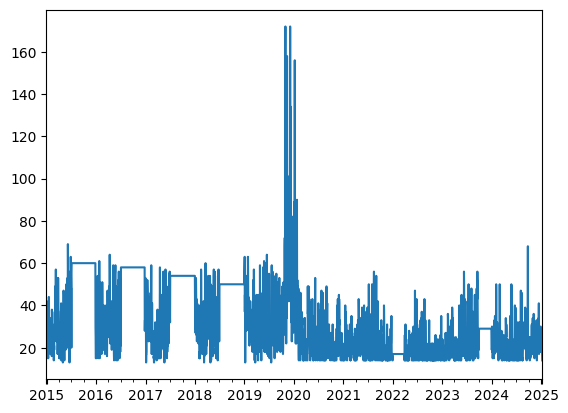

In [22]:
#normal
aqi_normal = new_data4['AQI']
aqi_normal.plot()

<Axes: >

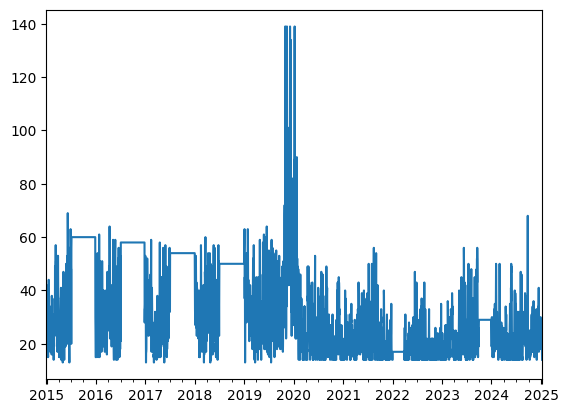

In [23]:
#smooth_iqr
aqi_smooth_iqr = new_data4['AQI_smoothed_iqr']
aqi_smooth_iqr.plot()

<Axes: >

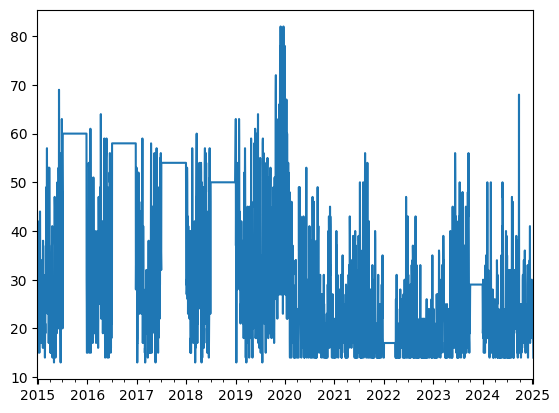

In [24]:
#smooth_zscore
aqi_smooth_zscore = new_data4['AQI_smoothed_zscore']
aqi_smooth_zscore.plot()

<Axes: >

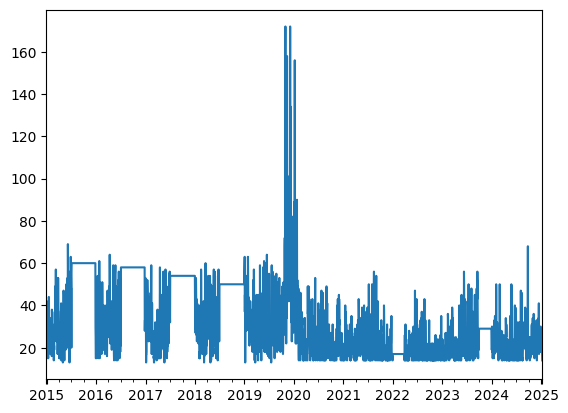

In [25]:
#smooth_rolling
aqi_smooth_rolling = new_data4['AQI_smoothed_rolling']
aqi_smooth_rolling.plot()

<Axes: >

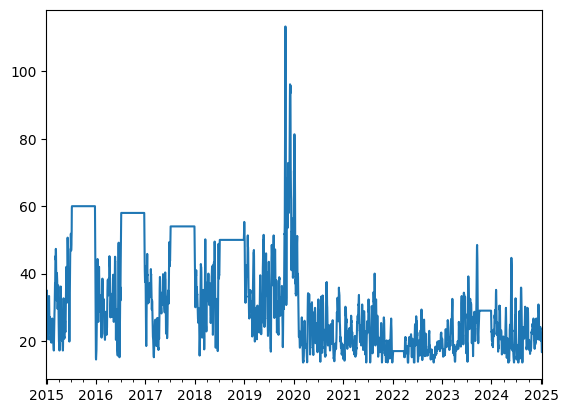

In [26]:
#smooth
aqi_smooth = new_smooth['AQI_Smooth']
aqi_smooth.plot()

# **2.1. Splitting & Preprocessing the Raw Data(Normal AQI)**

Smooth AQI(All Pollutants)

In [27]:
new_smooth.head(8)

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,AQI_Smooth
2014-12-29,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,32.000000
2014-12-30,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,32.000000
2014-12-31,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,32.000000
2015-01-01,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,32.000000
2015-01-02,2.964491,3.466667,14.816667,24.000000,34.166667,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,34.166667
2015-01-03,2.790287,3.150000,14.033333,24.166667,35.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,35.000000
2015-01-04,2.920940,3.000000,12.833333,20.666667,33.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,33.000000
2015-01-05,2.920940,3.000000,11.900000,18.333333,29.500000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,29.500000


In [28]:
new_smooth.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'AQI_Smooth'],
      dtype='object')

***Working with Normal AQI***

<Axes: >

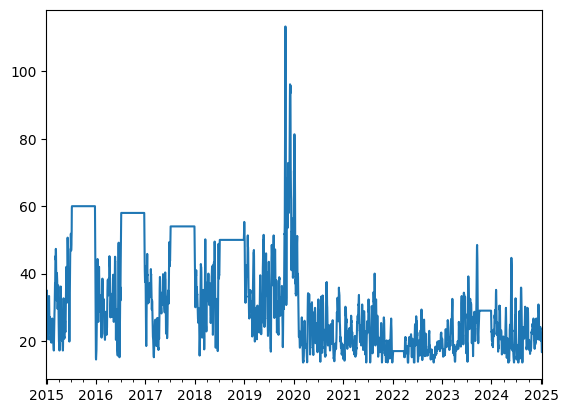

In [29]:
aqi_smooth.plot()

In [30]:
# Function to define window_size and convert data into X (features) and y (labels)
def new_data_to_X_y(new_data, window_size, train_pct, val_pct, test_pct):
    # Convert data to numpy array
    new_data_as_np = new_data.to_numpy()
    
    # Split data based on percentages
    total_len = len(new_data_as_np)
    train_end = int(train_pct * total_len)
    val_end = train_end + int(val_pct * total_len)
    
    # Prepare train, val, and test splits
    train_data = new_data_as_np[:train_end]
    val_data = new_data_as_np[train_end:val_end]
    test_data = new_data_as_np[val_end:]
    
    # Helper function to create X and y
    def create_X_y(data):
        X, y = [], []
        for i in range(len(data) - window_size):
            row = [[a] for a in data[i:i + window_size]]
            X.append(row)
            label = data[i + window_size]
            y.append(label)
        return np.array(X), np.array(y)
    
    # Create X and y for train, validation, and test
    X_train, y_train = create_X_y(train_data)
    X_val, y_val = create_X_y(val_data)
    X_test, y_test = create_X_y(test_data)
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [31]:
#passing data to function

# WINDOW_SIZE = 6
# train_pct=0.7
# val_pct=0.2
# test_pct=0.1
(X_train1, y_train1), (X_val1, y_val1), (X_test1, y_test1) = new_data_to_X_y(aqi_smooth, 6, 0.7, 0.2, 0.1)

# shapes
print("Train shapes:", X_train1.shape, y_train1.shape)
print("Validation shapes:", X_val1.shape, y_val1.shape)
print("Test shapes:", X_test1.shape, y_test1.shape)

Train shapes: (2559, 6, 1) (2559,)
Validation shapes: (727, 6, 1) (727,)
Test shapes: (361, 6, 1) (361,)


# **2.2. Model Training & Testing**

In [32]:
# libraries for building model and testing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# LSTM(Smooth)

In [33]:
model1 = Sequential()
model1.add(InputLayer((6, 1))) # 6 timestamp , 1 feature
model1.add(LSTM(32)) # LSTM layer with 16 units
model1.add(Dense(8, activation='relu')) # activation function- ReLU with 8 dense layer

model1.add(Dense(1, 'linear')) # output - linear and data- 1

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 32)                  │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,625 (18.07 KB)

 Trainable params: 4,625 (18.07 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
cp1 = ModelCheckpoint('/kaggle/working/model1.keras', save_best_only=True)

model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[RootMeanSquaredError()])

In [35]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp1])

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1561.5245 - root_mean_squared_error: 39.5122 - val_loss: 410.2011 - val_root_mean_squared_error: 20.2534
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1420.1332 - root_mean_squared_error: 37.6774 - val_loss: 300.4627 - val_root_mean_squared_error: 17.3339
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1204.0979 - root_mean_squared_error: 34.6959 - val_loss: 211.5633 - val_root_mean_squared_error: 14.5452
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 998.5748 - root_mean_squared_error: 31.5982 - val_loss: 122.4889 - val_root_mean_squared_error: 11.0675
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 775.3718 - root_mean_squared_error: 27.8387 - val_loss: 66.4167 - val_root_mean_squared_error: 8.1496
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 645.4032 - root_mean_squared_error: 25.3904 - val_loss: 38.6531 - val_root_mean_squared_error: 6.2172
Epoch 7/100
80/80 ━━━━━

In [36]:
from tensorflow.keras.models import load_model
model1 = load_model('/kaggle/working/model1.keras')

In [37]:
# Evaluate the model on the train data
train_result = model1.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 1.3004
Mean Squared Error (MSE): 5.9858
Root Mean Squared Error (RMSE): 2.4466
R-squared (Accuracy): 0.9751


In [38]:
# Evaluate the model on the validation data
val_result = model1.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 0.8991
Mean Squared Error (MSE): 1.6870
Root Mean Squared Error (RMSE): 1.2988
R-squared (Accuracy): 0.9474


In [39]:
# Evaluate the model on the test data
test_result = model1.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 1.1573
Mean Squared Error (MSE): 2.4168
Root Mean Squared Error (RMSE): 1.5546
R-squared (Accuracy): 0.9177


In [40]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Train Predictions,Actuals
0,34.638767,33.000000
1,31.282694,29.500000
2,27.604012,26.166667
3,24.711355,24.833333
4,24.386623,25.000000
...,...,...
2554,14.417193,14.333333
2555,14.981708,15.166667
2556,15.865878,16.000000
2557,16.600033,16.500000


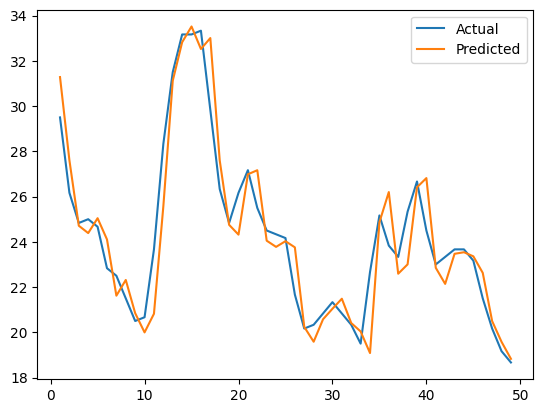

In [41]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [42]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,17.099260,17.000000
1,17.099260,17.000000
2,17.099260,17.000000
3,17.099260,17.000000
4,17.099260,17.000000
...,...,...
722,19.968771,20.166667
723,19.872652,20.500000
724,20.754435,20.666667
725,20.645931,20.500000


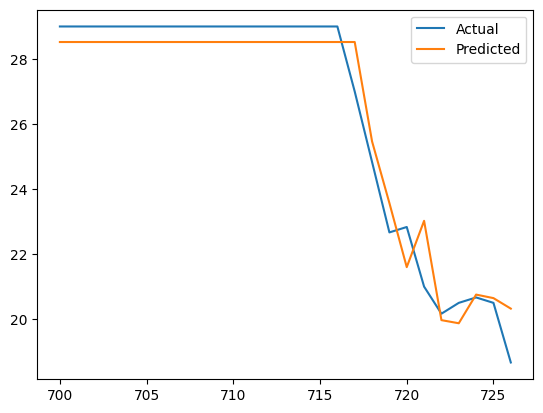

In [43]:
plt.plot(val_results['Actuals'][700:], label='Actual')
plt.plot(val_results['Train Predictions'][700:], label='Predicted')
plt.legend()
plt.show()

In [44]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,23.800764,23.166667
1,22.968973,22.000000
2,21.195473,21.333333
3,20.939383,23.333333
4,24.539938,22.333333
...,...,...
356,20.777420,20.500000
357,20.217516,18.000000
358,16.945896,16.666667
359,16.448526,16.666667


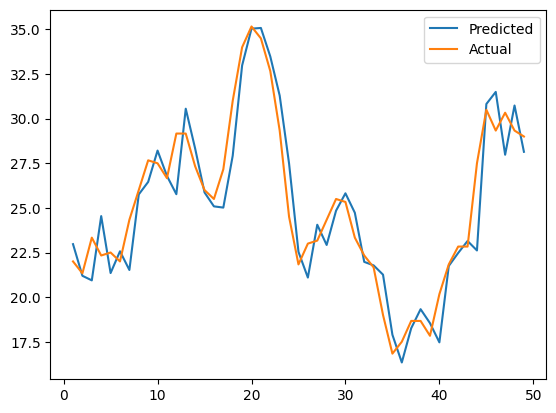

In [45]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

# GRU(Smooth)

In [46]:
model2 = Sequential()
model2.add(InputLayer((6, 1)))
model2.add(GRU(32))
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 32)                  │           3,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,633 (14.19 KB)

 Trainable params: 3,633 (14.19 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
cp2 = ModelCheckpoint('/kaggle/working/model2.keras', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[RootMeanSquaredError()])

In [48]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), 
           epochs=100, callbacks=[cp2])

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1600.6884 - root_mean_squared_error: 40.0043 - val_loss: 490.8961 - val_root_mean_squared_error: 22.1562
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1583.2428 - root_mean_squared_error: 39.7847 - val_loss: 489.1871 - val_root_mean_squared_error: 22.1176
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1520.7577 - root_mean_squared_error: 38.9845 - val_loss: 487.4867 - val_root_mean_squared_error: 22.0791
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1546.2600 - root_mean_squared_error: 39.3209 - val_loss: 485.7881 - val_root_mean_squared_error: 22.0406
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1572.5663 - root_mean_squared_error: 39.6543 - val_loss: 484.0952 - val_root_mean_squared_error: 22.0022
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1557.4410 - root_mean_squared_error: 39.4581 - val_loss: 482.4053 - val_root_mean_squared_error: 21.9637
Epoch 7/100
80/8

In [49]:
from tensorflow.keras.models import load_model
model2 = load_model('/kaggle/working/model2.keras')

In [50]:
# Evaluate the model on the train data
train_result = model2.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 32.7004
Mean Squared Error (MSE): 1309.3535
Root Mean Squared Error (RMSE): 36.1850
R-squared (Accuracy): -4.4547


In [51]:
# Evaluate the model on the validation data
val_result = model2.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 17.5170
Mean Squared Error (MSE): 338.9067
Root Mean Squared Error (RMSE): 18.4094
R-squared (Accuracy): -9.5705


In [52]:
# Evaluate the model on the test data
test_result = model2.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 18.1232
Mean Squared Error (MSE): 357.8235
Root Mean Squared Error (RMSE): 18.9162
R-squared (Accuracy): -11.1821


In [53]:
train_predictions = model2.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Train Predictions,Actuals
0,3.943151,33.000000
1,3.943151,29.500000
2,3.943151,26.166667
3,3.943151,24.833333
4,3.943151,25.000000
...,...,...
2554,3.943151,14.333333
2555,3.943151,15.166667
2556,3.943151,16.000000
2557,3.943151,16.500000


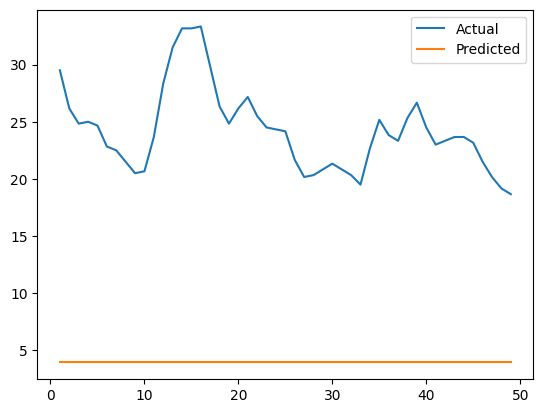

In [54]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [55]:
val_predictions = model2.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,3.943151,17.000000
1,3.943151,17.000000
2,3.943151,17.000000
3,3.943151,17.000000
4,3.943151,17.000000
...,...,...
722,3.943151,20.166667
723,3.943151,20.500000
724,3.943151,20.666667
725,3.943151,20.500000


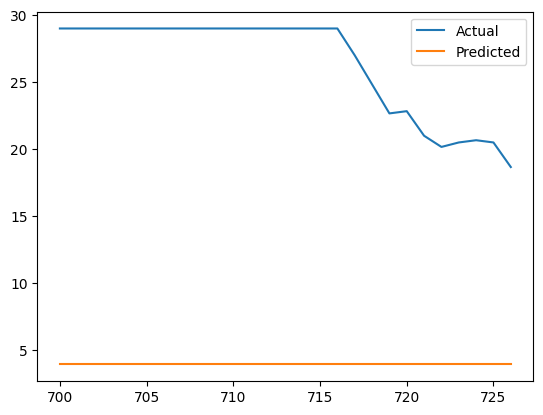

In [56]:
plt.plot(val_results['Actuals'][700:], label='Actual')
plt.plot(val_results['Train Predictions'][700:], label='Predicted')
plt.legend()
plt.show()

In [57]:
test_predictions = model2.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,3.943151,23.166667
1,3.943151,22.000000
2,3.943151,21.333333
3,3.943151,23.333333
4,3.943151,22.333333
...,...,...
356,3.943151,20.500000
357,3.943151,18.000000
358,3.943151,16.666667
359,3.943151,16.666667


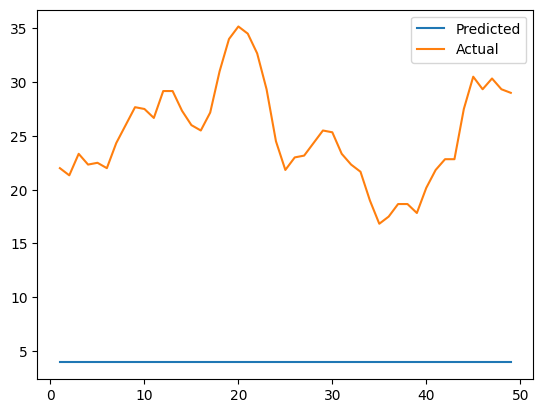

In [58]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

# RNN(Smooth)

In [59]:
model3 = Sequential()
model3.add(InputLayer((6, 1)))
model3.add(SimpleRNN(32))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,361 (5.32 KB)

 Trainable params: 1,361 (5.32 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
cp3 = ModelCheckpoint('/kaggle/working/model3.keras', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[RootMeanSquaredError()])

In [61]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), 
           epochs=100, callbacks=[cp3])

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1323.8478 - root_mean_squared_error: 36.3785 - val_loss: 250.4959 - val_root_mean_squared_error: 15.8271
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1046.7661 - root_mean_squared_error: 32.3487 - val_loss: 135.5546 - val_root_mean_squared_error: 11.6428
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 835.1766 - root_mean_squared_error: 28.8840 - val_loss: 63.8182 - val_root_mean_squared_error: 7.9886
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 620.1930 - root_mean_squared_error: 24.8988 - val_loss: 32.6956 - val_root_mean_squared_error: 5.7180
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 480.2794 - root_mean_squared_error: 21.8914 - val_loss: 28.1618 - val_root_mean_squared_error: 5.3068
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 358.0873 - root_mean_squared_error: 18.9151 - val_loss: 5.4801 - val_root_mean_squared_error: 2.3410
Epoch 7/100
80/80 ━━━━━━━━━━━

In [62]:
from tensorflow.keras.models import load_model
model3 = load_model('/kaggle/working/model3.keras')

In [63]:
# Evaluate the model on the train data
train_result = model3.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 1.3457
Mean Squared Error (MSE): 6.2344
Root Mean Squared Error (RMSE): 2.4969
R-squared (Accuracy): 0.9740


In [64]:
# Evaluate the model on the validation data
val_result = model3.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 0.9446
Mean Squared Error (MSE): 1.7447
Root Mean Squared Error (RMSE): 1.3209
R-squared (Accuracy): 0.9456


In [65]:
# Evaluate the model on the test data
test_result = model3.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 1.1390
Mean Squared Error (MSE): 2.3614
Root Mean Squared Error (RMSE): 1.5367
R-squared (Accuracy): 0.9196


In [66]:
train_predictions = model3.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Train Predictions,Actuals
0,34.495773,33.000000
1,31.053219,29.500000
2,27.032455,26.166667
3,24.134031,24.833333
4,24.253132,25.000000
...,...,...
2554,14.343406,14.333333
2555,14.970095,15.166667
2556,15.932484,16.000000
2557,16.686499,16.500000


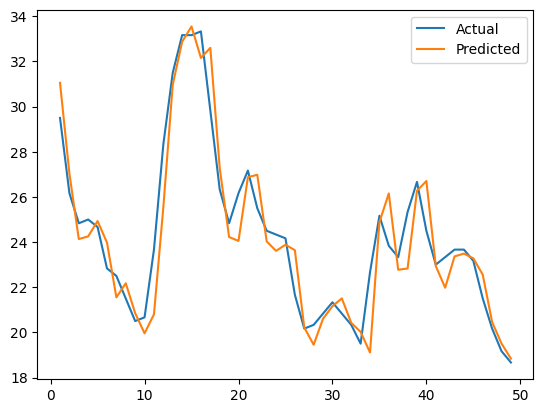

In [67]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [68]:
val_predictions = model3.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,17.231466,17.000000
1,17.231466,17.000000
2,17.231466,17.000000
3,17.231466,17.000000
4,17.231466,17.000000
...,...,...
722,20.047112,20.166667
723,19.775099,20.500000
724,20.772963,20.666667
725,20.746735,20.500000


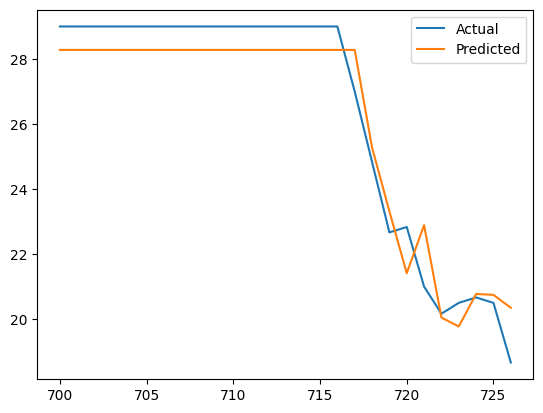

In [69]:
plt.plot(val_results['Actuals'][700:], label='Actual')
plt.plot(val_results['Train Predictions'][700:], label='Predicted')
plt.legend()
plt.show()

In [70]:
test_predictions = model3.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,23.880207,23.166667
1,23.026756,22.000000
2,21.145020,21.333333
3,20.861244,23.333333
4,24.488556,22.333333
...,...,...
356,20.924549,20.500000
357,20.263180,18.000000
358,16.957283,16.666667
359,16.365517,16.666667


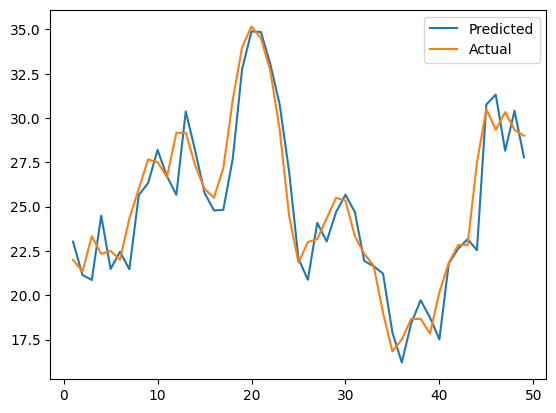

In [71]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()